# 1. RNN

순환 신경망(Recurrent Neural Networks, RNN)은 시퀀스 데이터를 처리하기 위해 설계된 신경망입니다. RNN은 이전 입력에 대한 정보를 유지하고 이를 다음 입력 처리에 활용합니다. 이 특징 덕분에 언어 모델링, 시계열 예측, 음성 인식 등에서 효과적입니다.



- 시퀀스 데이터 처리: RNN은 시퀀스 데이터를 순차적으로 처리합니다.
- 은닉 상태: 이전 입력의 정보를 저장하여 현재와 미래 입력 처리에 활용합니다.
- 순환 연결: RNN은 이전 시간 단계의 은닉 상태를 현재 시간 단계의 입력으로 사용합니다.

구조
- 입력 층: 시퀀스 데이터를 입력받습니다.
- 은닉 층: 입력과 이전 은닉 상태를 기반으로 새로운 은닉 상태를 계산합니다.
- 출력 층: 각 시간 단계에서 출력값을 생성합니다.

## 1) RNN Cell 구현

우선 RNN Cell을 직접 구현해서 구조를 확인해 보겠습니다.

torchtext는 텍스트 데이터를 처리하고, 전처리하는 데 유용한 도구를 제공하는 파이토치의 라이브러리입니다.

torch version과 torchtext 버전 비교 테이블

--> https://github.com/pytorch/text?tab=readme-ov-file

현재 수업자료는 pytorch==2.3.0, torchtext==0.18.0 기준

In [ ]:
!pip3 install torch==2.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
pip install torch==2.3.0 torchvision==0.18.0 torchtext==0.18.0 torchaudio==2.3.0 #버전 맞춰 한꺼번에 설치

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.21.0+cu124
    Uninstalling torchvision-0.21.0+cu124:
      Successfully uninstalled torchvision-0.21.0+cu124
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.6.0+cu124
    Uninstalling torchaudio-2.6.0+cu124:
      Successfully uninstalled torchaudio-2.6.0+cu124


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt

In [ ]:
torch.__version__ # 버전, 코드 호환성 문제 사전에 확인

'2.3.0+cu121'

In [ ]:
import torch
import torchvision
import torchtext
import torchaudio

print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)
print("torchtext:", torchtext.__version__)
print("torchaudio:", torchaudio.__version__)

AttributeError: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

In [ ]:
!pip3 install torchtext==0.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import torchtext

In [ ]:
torchtext.__version__

'0.18.0+cpu'

In [ ]:
from torchtext.data.utils import get_tokenizer
# build_vocab_from_iterator : 텍스트 데이터에서 단어집합을 생성
from torchtext.vocab import build_vocab_from_iterator

/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated

In [ ]:
import random
from tqdm import tqdm
import urllib.request
import os
import tarfile # # tar 압축 파일 해제를 위한 라이브러리
import time

IMDB 데이터셋 다운로드 및 추출

IMDB 데이터셋은 영화 리뷰와 해당 리뷰의 감정 레이블(긍정 또는 부정)을 포함하는 텍스트 데이터셋입니다.    
이 데이터셋은 자연어 처리(NLP)와 텍스트 분류 작업에서 널리 사용됩니다.

구성
- 리뷰 텍스트: 영화에 대한 사용자 리뷰. 각 리뷰는 다양한 길이를 가지며, 감정 분석을 위해 텍스트 데이터로 사용됩니다.
- 감정 레이블: 각 리뷰에 할당된 감정 레이블로, 긍정적인 리뷰는 'pos', 부정적인 리뷰는 'neg'으로 표시됩니다.


데이터셋 세부 정보
- 훈련 데이터: 25,000개의 리뷰 (긍정 리뷰 12,500개, 부정 리뷰 12,500개)
- 테스트 데이터: 25,000개의 리뷰 (긍정 리뷰 12,500개, 부정 리뷰 12,500개)
- 총 데이터: 50,000개의 리뷰

In [ ]:
from pathlib import Path

# 경로 만들기
dataset_path = Path("/content/data")

# 하위 파일 경로 합치기
file_path = dataset_path / "aclImdb_v1.tar.gz"
print(file_path)  # /content/data/aclImdb_v1.tar.gz

# 폴더가 있는지 확인하고 없으면 생성하기
dataset_path.mkdir(parents=True, exist_ok=True)

# 파일 이름만 얻기
print(file_path.name)  # aclImdb_v1.tar.gz

# 폴더 이름만 얻기
print(file_path.parent)  # /content/data

# 확장자 분리
print(file_path.suffix)  # .gz
print(file_path.stem)    # aclImdb_v1.tar

# 경로가 실제 존재하는지 확인
print(file_path.exists())  # True/False

/content/data/aclImdb_v1.tar.gz
aclImdb_v1.tar.gz
/content/data
.gz
aclImdb_v1.tar
True


In [ ]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
dataset_path = "./data"
file_path = os.path.join(dataset_path, "aclImdb_v1.tar.gz")

os.makedirs(dataset_path, exist_ok=True)

# 파일 다운로드 및 저장
if not os.path.isfile(file_path):
    urllib.request.urlretrieve(url, file_path)

# 데이터셋 압축 풀기
extracted_path = os.path.join(dataset_path, "aclImdb")
if not os.path.exists(extracted_path):
    with tarfile.open(file_path, "r:gz") as tar:
        tar.extractall(path=dataset_path)

데이터로드

In [ ]:
# 데이터셋 로드 및 전처리
def load_imdb_data(split='train', max_num = 0):
    data_path = os.path.join(dataset_path, "aclImdb", split)
    data = []
    for label in ['pos', 'neg']:
        # .data/aclImdb/train(or test)/ + pos(or neg)
        dir_path = os.path.join(data_path, label)
        for idx, fname in tqdm(enumerate(os.listdir(dir_path)), desc=f'{split} {label}'):
            # 파일이 텍스트 파일(".txt")인지 확인
            if fname.endswith(".txt"):
                with open(os.path.join(dir_path, fname), "r", encoding="utf-8") as f:
                    text = f.read()
                    if label == 'pos':
                        data.append((1, text))
                    elif label == 'neg':
                        data.append((0, text))
            if idx >= max_num > 0:
                break

    return data

train_raw_data = load_imdb_data('train', 10000)
test_raw_data = load_imdb_data('test', 1500)

train pos: 10000it [00:41, 240.71it/s]
train neg: 10000it [00:41, 242.63it/s]
test pos: 1500it [00:06, 247.82it/s]
test neg: 1500it [00:06, 241.52it/s]


In [ ]:
import pickle
with open('data/aclImdb_dataset.pkl', 'wb') as f:
    pickle.dump((train_raw_data, test_raw_data), f)

In [ ]:
print(train_raw_data[0])
print(test_raw_data[0])

(1, 'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!')
(1, "I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was 

전처리

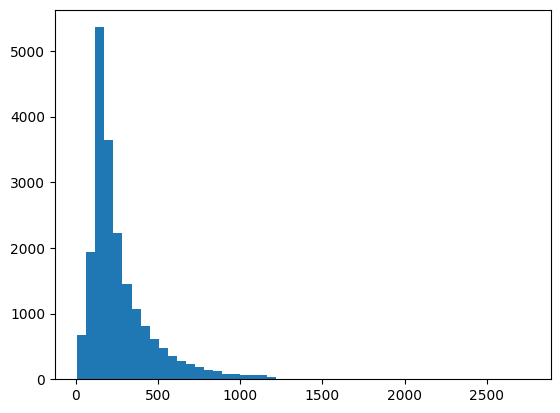

In [ ]:
# 토크나이저 정의
tokenizer = get_tokenizer("basic_english")
t_len = []
for label, text in train_raw_data:
    t_len.append(len(tokenizer(text)))

plt.hist(t_len, bins=50)
plt.show()

In [ ]:
max_len = 300

stop_words = ['a', 'an', 'the', 'at', 'in', 'on', 'of', 'with', 'to', 'for', 'by', 'i', 'you', 'me', 'he', 'she', 'it', 'is', 'are', 'was', 'were', 'they', 'this', 'that', 'these', 'those', 'my', 'your', 'his', 'her', 'its', 'our', 'their', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'where', 'when', 'so', 'which', 'what', 'whom', 'whose', 'which', 'how', 'be', 'do', 'have', 'can', 'will', 'would', 'should', 'could', 'may', 'might', 'must', 'shall', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'up', 'down', 'out', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']
# 텍스트 전처리
def preprocess_text(text):
    tokens = [t for t in tokenizer(text.lower()) if len(t) > 1 and t not in stop_words]
    tokens = tokens[:max_len] + ['<pad>'] * (max_len - len(tokens))

    return tokens

# 데이터 전처리
train_data = [(preprocess_text(text), label) for label, text in train_raw_data]
test_data = [(preprocess_text(text), label) for label, text in test_raw_data]

In [ ]:
# 텍스트 길이 출력
len(train_data[0][0])

200

In [ ]:
# 텍스트 출력
print(train_data[0][0])

['bromwell', 'high', 'cartoon', 'comedy', 'ran', 'time', 'programs', 'school', 'life', 'teachers', '35', 'years', 'teaching', 'profession', 'lead', 'believe', 'bromwell', 'high', 'satire', 'much', 'closer', 'reality', 'teachers', 'scramble', 'survive', 'financially', 'insightful', 'students', 'who', 'see', 'right', 'pathetic', 'teachers', 'pomp', 'pettiness', 'whole', 'situation', 'remind', 'schools', 'knew', 'students', 'saw', 'episode', 'student', 'repeatedly', 'tried', 'burn', 'school', 'immediately', 'recalled', 'high', 'classic', 'line', 'inspector', 'sack', 'one', 'teachers', 'student', 'welcome', 'bromwell', 'high', 'expect', 'many', 'adults', 'age', 'think', 'bromwell', 'high', 'far', 'fetched', 'pity', 'isn', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<

데이터 분할

In [ ]:
# 훈련 데이터를 훈련 데이터와 검증 데이터로 분할
random.seed(1004)
random.shuffle(train_data)
train_size = int(0.8 * len(train_data))
train_data, valid_data = train_data[:train_size], train_data[train_size:]

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 16001
Number of validation examples: 4001
Number of testing examples: 3002


어휘집 생성 및 출력

In [ ]:
# 데이터셋을 순회하며 각 텍스트(리뷰)를 반환하는 제너레이터 함수 정의
def yield_tokens(data_iter):
    for text, _ in data_iter:
        yield text

print(next(iter(yield_tokens(train_data))))

['lovely', 'danish', 'actress', 'sonja', 'richter', 'steals', 'film', 'from', 'noses', 'everyone', 'small', 'feat', 'considering', 'terrific', 'performances', 'surrounding', 'richter', 'plays', 'anna', 'out-of-work', 'independent-minded', 'somewhat', 'neurotic', 'perhaps', 'suicidal', 'actress', 'who', 'lands', 'desperation', 'job', 'looking', 'wheelchair-bound', 'muted', 'aged', 'father', 'named', 'walentin', 'great', 'danish', 'actor', 'frits', 'helmuth', 'who', 'died', '77', 'shortly', 'film', 'made', 'spoiler', 'alert', 'walentin', 'refuses', 'respond', 'anyone', '--until', 'confronts', 'gifted', 'anna', 'whimsical', 'mischievous', 'manner', 'brings', 'poor', 'old', 'battered', 'devil', 'back', 'from', 'self-imposed', 'death', 'sentence', 'writer/director/actor', 'eric', 'clausen', 'has', 'made', 'strong', 'film', 'difficulty', 'ponderous', 'businessman', 'son', 'jorgen', 'played', 'clausen', 'has', 'loving', 'father', 'who', 'has', 'never', 'accepted', 'him', 'film', 'sags', 'towa

In [ ]:
# 훈련 데이터셋으로부터 어휘집을 생성
# 제너레이터를 사용하여 단어를 추출
# 특별 토큰 <unk>와 <pad>를 어휘집에 포함
# 최소 20회 이상 등장한 단어만 어휘집에 포함
# 최대 10000개의 단어를 어휘집에 포함
TEXT_vocab = build_vocab_from_iterator(yield_tokens(train_data), specials=["<unk>", "<pad>"], min_freq=20, max_tokens=10000) # 만개는 빈도
# 어휘집에 없는 단어에 대해 <unk> 토큰의 인덱스를 반환하도록 설정
TEXT_vocab.set_default_index(TEXT_vocab["<unk>"])

LABEL_vocab = {0: "neg", 1: "pos"}

print(f"Unique tokens in TEXT vocabulary: {len(TEXT_vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL_vocab)}")

print(LABEL_vocab)

# 첫 번째 예제 출력
print(train_data[0])

Unique tokens in TEXT vocabulary: 9548
Unique tokens in LABEL vocabulary: 2
{0: 'neg', 1: 'pos'}
(['lovely', 'danish', 'actress', 'sonja', 'richter', 'steals', 'film', 'from', 'noses', 'everyone', 'small', 'feat', 'considering', 'terrific', 'performances', 'surrounding', 'richter', 'plays', 'anna', 'out-of-work', 'independent-minded', 'somewhat', 'neurotic', 'perhaps', 'suicidal', 'actress', 'who', 'lands', 'desperation', 'job', 'looking', 'wheelchair-bound', 'muted', 'aged', 'father', 'named', 'walentin', 'great', 'danish', 'actor', 'frits', 'helmuth', 'who', 'died', '77', 'shortly', 'film', 'made', 'spoiler', 'alert', 'walentin', 'refuses', 'respond', 'anyone', '--until', 'confronts', 'gifted', 'anna', 'whimsical', 'mischievous', 'manner', 'brings', 'poor', 'old', 'battered', 'devil', 'back', 'from', 'self-imposed', 'death', 'sentence', 'writer/director/actor', 'eric', 'clausen', 'has', 'made', 'strong', 'film', 'difficulty', 'ponderous', 'businessman', 'son', 'jorgen', 'played', 'cl

In [ ]:
TEXT_vocab['<unk>'], TEXT_vocab['<pad>'], TEXT_vocab['럭키비키']

(0, 1, 0)

In [ ]:
TEXT_vocab.get_stoi() #string to index

{'zabriskie': 9547,
 'woven': 9541,
 'willingly': 9539,
 'weirdness': 9537,
 'weaves': 9535,
 'wallach': 9534,
 'villagers': 9531,
 'vanishes': 9528,
 'unnerving': 9524,
 'unfairly': 9522,
 'uneducated': 9520,
 'treating': 9513,
 'timed': 9509,
 'thankful': 9507,
 'texture': 9506,
 'stoned': 9498,
 'stoic': 9497,
 'spectrum': 9494,
 'speaker': 9492,
 'smallville': 9490,
 'shocker': 9485,
 'shelter': 9484,
 'semi': 9480,
 'self-absorbed': 9479,
 'secluded': 9478,
 'sailors': 9474,
 'sacred': 9472,
 'robocop': 9469,
 'resonance': 9463,
 'resembled': 9462,
 'repair': 9458,
 'raul': 9454,
 'rant': 9451,
 'rainbow': 9450,
 'railroad': 9449,
 'qualified': 9447,
 'puns': 9445,
 'pressures': 9440,
 'postman': 9438,
 'plotted': 9434,
 'pilots': 9431,
 'perceived': 9429,
 'penalty': 9428,
 'peaks': 9427,
 'outs': 9422,
 'oriented': 9419,
 'nun': 9416,
 'morton': 9409,
 'morse': 9408,
 'moderately': 9404,
 'missions': 9400,
 'micheal': 9397,
 'meetings': 9396,
 'mcqueen': 9395,
 'maya': 9394,
 'm

In [ ]:
sorted(TEXT_vocab.get_stoi().items(), key=lambda x : x[1]) # 빈도

[('<unk>', 0),
 ('<pad>', 1),
 ('movie', 2),
 ('film', 3),
 ('one', 4),
 ('who', 5),
 ('from', 6),
 ('like', 7),
 ('has', 8),
 ('good', 9),
 ('even', 10),
 ('time', 11),
 ('story', 12),
 ('really', 13),
 ('see', 14),
 ('had', 15),
 ('we', 16),
 ('much', 17),
 ('well', 18),
 ('get', 19),
 ('people', 20),
 ('great', 21),
 ('been', 22),
 ('bad', 23),
 ('also', 24),
 ('first', 25),
 ('him', 26),
 ('made', 27),
 ('way', 28),
 ('movies', 29),
 ('them', 30),
 ('make', 31),
 ('think', 32),
 ('characters', 33),
 ('watch', 34),
 ('character', 35),
 ('films', 36),
 ('seen', 37),
 ('being', 38),
 ('many', 39),
 ('two', 40),
 ('show', 41),
 ('plot', 42),
 ('never', 43),
 ('love', 44),
 ('acting', 45),
 ('did', 46),
 ('best', 47),
 ('life', 48),
 ('little', 49),
 ('know', 50),
 ('ever', 51),
 ('does', 52),
 ('better', 53),
 ('still', 54),
 ('man', 55),
 ('say', 56),
 ('end', 57),
 ('scene', 58),
 ('ve', 59),
 ('go', 60),
 ('scenes', 61),
 ('something', 62),
 ('back', 63),
 ('watching', 64),
 ('doesn

In [ ]:
len(TEXT_vocab(train_data[0][0]))

200

In [ ]:
print(train_data[0][0])
print(TEXT_vocab(train_data[0][0]))

['lovely', 'danish', 'actress', 'sonja', 'richter', 'steals', 'film', 'from', 'noses', 'everyone', 'small', 'feat', 'considering', 'terrific', 'performances', 'surrounding', 'richter', 'plays', 'anna', 'out-of-work', 'independent-minded', 'somewhat', 'neurotic', 'perhaps', 'suicidal', 'actress', 'who', 'lands', 'desperation', 'job', 'looking', 'wheelchair-bound', 'muted', 'aged', 'father', 'named', 'walentin', 'great', 'danish', 'actor', 'frits', 'helmuth', 'who', 'died', '77', 'shortly', 'film', 'made', 'spoiler', 'alert', 'walentin', 'refuses', 'respond', 'anyone', '--until', 'confronts', 'gifted', 'anna', 'whimsical', 'mischievous', 'manner', 'brings', 'poor', 'old', 'battered', 'devil', 'back', 'from', 'self-imposed', 'death', 'sentence', 'writer/director/actor', 'eric', 'clausen', 'has', 'made', 'strong', 'film', 'difficulty', 'ponderous', 'businessman', 'son', 'jorgen', 'played', 'clausen', 'has', 'loving', 'father', 'who', 'has', 'never', 'accepted', 'him', 'film', 'sags', 'towa

In [ ]:
class IMDBDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text, label = self.data[idx]
        return torch.tensor(TEXT_vocab(text)), torch.tensor(label)

In [ ]:
train_dataset = IMDBDataset(train_data)
valid_dataset = IMDBDataset(valid_data)
test_dataset = IMDBDataset(test_data)

In [ ]:
train_dataset[0]

(tensor([1126, 4942,  408,    0,    0, 2151,    3,    6,    0,  180,  300, 5794,
          887, 1175,  256, 2945,    0,  198, 2212,    0,    0,  536, 5822,  277,
            0,  408,    5, 5504, 4206,  197,  196,    0, 9411, 3163,  219,  625,
            0,   21, 4942,  170,    0,    0,    5, 1022,    0, 3526,    3,   27,
         1388, 5451,    0, 2929, 7664,  148,    0, 8404, 4809, 2212, 6986,    0,
         1204,  819,  225,   82,    0, 1843,   63,    6,    0,  238, 3712,    0,
         1562,    0,    8,   27,  456,    3, 6152,    0, 5461,  374,    0,  152,
            0,    8, 1733,  219,    5,    8,   43, 2883,   26,    3,    0, 1776,
           57,    0,    8,  560,   99,   56,    0,  758,  973, 1733, 2703,    4,
          284,    0, 2212, 7716,  156,  301,   48,  410,  959,    0,    0,  140,
          462,  195, 1710, 7156,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [ ]:
BATCH_SIZE = 256
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
next(iter(train_loader))[0].shape, next(iter(train_loader))[1]

(torch.Size([256, 300]),
 tensor([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
         0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
         1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
         1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
         0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
         0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
         0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
         1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
         1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
         0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
         1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]))

In [ ]:
x = next(iter(train_loader))[0]

In [ ]:
vocab_size = len(TEXT_vocab)
embedding_dim = 100
hidden_size = 128

em = nn.Embedding(vocab_size, embedding_dim) #label encoding --> embedding_vector(dense)
rnn = nn.GRU(embedding_dim, hidden_size, batch_first=True, bidirectional=True, num_layers=2)
emb_x = em(x)
print(emb_x.shape)
out, h = rnn(emb_x)
# print(out.shape, h.shape)


torch.Size([256, 300, 100])
torch.Size([256, 300, 256]) torch.Size([4, 256, 128])


RNNCell_Encoder, Net 정의

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RNNCls(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size):
        super(RNNCls, self).__init__()
        self.em = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.GRU(embedding_dim, hidden_size, batch_first=True, bidirectional=True, num_layers=2)
        self.fc1 = nn.Linear(hidden_size*2, 128)
        self.relu = nn.ReLU()
        self.dout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, 1) # binary classification # 그 외 분류는 class의 개수 만큼
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.em(x)
        out, _ = self.rnn(x)
        x = self.fc1(out[:, -1, :]) #맨 마지막 hidden state
        x = self.dout(self.relu(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [ ]:
# 임베딩 벡터의 차원
embeding_dim = 128

# 은닉층의 크기
hidden_size = 256

# 단어 집합의 크기
vocab_size = len(TEXT_vocab)

In [ ]:
rnn_cls = RNNCls(vocab_size, embeding_dim, hidden_size)
rnn_cls.to(device)

loss_fn = nn.BCELoss() # 이진분류 <- 학습의 목표
optimizer = torch.optim.Adam(rnn_cls.parameters(), lr=0.001) # 학습의 도구

In [ ]:
rnn_cls

RNNCls(
  (em): Embedding(9548, 128)
  (rnn): GRU(128, 256, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (relu): ReLU()
  (dout): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
samples = next(iter(train_loader))[0].to(device)
samples.shape

torch.Size([512, 200])

In [ ]:
rnn_cls(samples).shape

torch.Size([512, 1])

In [ ]:
def training(epoch, model, trainloader, validloader):
    correct = 0
    total = 0
    running_loss = 0

    model.train()
    for x, y in tqdm(trainloader, desc = f'{epoch} epoch'):
        x, y = x.to(device), y.to(device).unsqueeze(1).float()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            y_pred = (y_pred > 0.5).float() # 쓰레스홀드 = 0.5 기준
            correct += (y_pred == y).sum().item() # Accuracy OK (부정, 긍정 비율 비슷, 리스크 x)
            total += y.size(0)
            running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / total

    valid_correct = 0
    valid_total = 0
    valid_running_loss = 0

    model.eval()
    with torch.no_grad():
        for x, y in validloader:
            x, y = x.to(device), y.to(device).unsqueeze(1).float()
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = (y_pred > 0.5).float()
            valid_correct += (y_pred == y).sum().item()
            valid_total += y.size(0)
            valid_running_loss += loss.item()

    epoch_valid_loss = valid_running_loss / len(validloader.dataset)
    epoch_valid_acc = valid_correct / valid_total

    print('epoch: ', epoch,
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'valid_loss： ', round(epoch_valid_loss, 3),
          'valid_accuracy:', round(epoch_valid_acc, 3)
          )
    return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

In [ ]:
epochs = 10
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch,
                                                                        rnn_cls,
                                                                        train_loader,
                                                                        valid_loader)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    valid_loss.append(epoch_valid_loss)
    valid_acc.append(epoch_valid_acc)

0 epoch: 100%|██████████| 63/63 [00:09<00:00,  6.43it/s]


epoch:  0 loss：  0.003 accuracy: 0.501 valid_loss：  0.003 valid_accuracy: 0.509


1 epoch: 100%|██████████| 63/63 [00:09<00:00,  6.73it/s]


epoch:  1 loss：  0.003 accuracy: 0.511 valid_loss：  0.003 valid_accuracy: 0.507


2 epoch: 100%|██████████| 63/63 [00:09<00:00,  6.61it/s]


epoch:  2 loss：  0.003 accuracy: 0.519 valid_loss：  0.003 valid_accuracy: 0.505


3 epoch: 100%|██████████| 63/63 [00:09<00:00,  6.70it/s]


epoch:  3 loss：  0.003 accuracy: 0.525 valid_loss：  0.003 valid_accuracy: 0.505


4 epoch: 100%|██████████| 63/63 [00:09<00:00,  6.59it/s]


epoch:  4 loss：  0.003 accuracy: 0.53 valid_loss：  0.003 valid_accuracy: 0.504


5 epoch: 100%|██████████| 63/63 [00:09<00:00,  6.77it/s]


epoch:  5 loss：  0.003 accuracy: 0.546 valid_loss：  0.003 valid_accuracy: 0.636


6 epoch: 100%|██████████| 63/63 [00:09<00:00,  6.56it/s]


epoch:  6 loss：  0.002 accuracy: 0.75 valid_loss：  0.002 valid_accuracy: 0.792


7 epoch: 100%|██████████| 63/63 [00:09<00:00,  6.55it/s]


epoch:  7 loss：  0.001 accuracy: 0.861 valid_loss：  0.002 valid_accuracy: 0.822


8 epoch: 100%|██████████| 63/63 [00:09<00:00,  6.58it/s]


epoch:  8 loss：  0.001 accuracy: 0.907 valid_loss：  0.002 valid_accuracy: 0.837


9 epoch: 100%|██████████| 63/63 [00:09<00:00,  6.60it/s]


epoch:  9 loss：  0.001 accuracy: 0.942 valid_loss：  0.002 valid_accuracy: 0.841


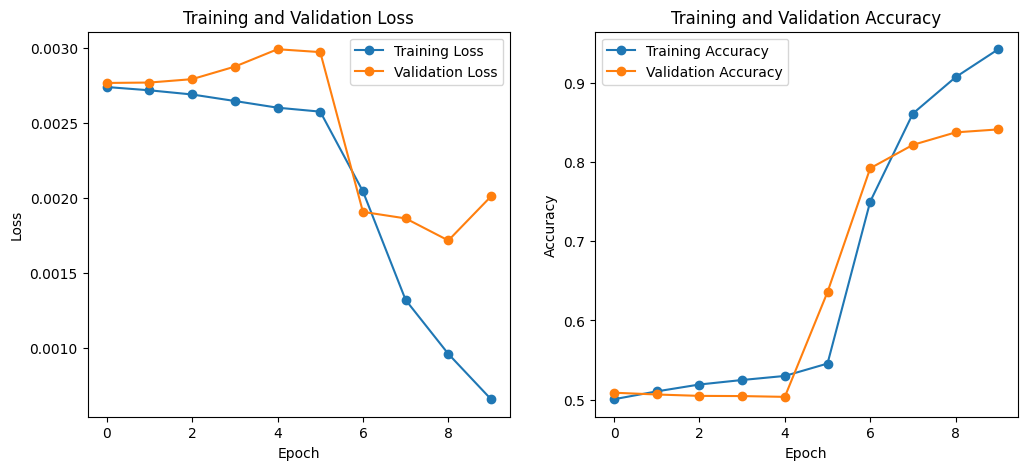

In [ ]:
import matplotlib.pyplot as plt

# 손실 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, 'o-', label='Training Loss')
plt.plot(valid_loss, 'o-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 정확도 시각화
plt.subplot(1, 2, 2)
plt.plot(train_acc, 'o-', label='Training Accuracy')
plt.plot(valid_acc, 'o-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
# 텍스트 전처리 함수 (이미 정의된 preprocess_text 사용)
def preprocess_input_text(text):
    tokens = preprocess_text(text)
    label_enc = torch.tensor([TEXT_vocab(tokens)])
    return label_enc

# 감성 예측 함수
def predict_sentiment(model, text, threshold=0.5):
    model.eval()  # 평가 모드로 전환
    with torch.no_grad():
        # 입력 텍스트를 전처리
        input_tensor = preprocess_input_text(text).to(device)

        # 모델에 입력하고 예측값 반환
        output = model(input_tensor)

        # 시그모이드로 나온 값을 기반으로 긍정/부정 결정
        prediction = (output > threshold).float()

        if prediction.item() == 1:
            return "Positive"
        else:
            return "Negative"

In [ ]:
# 1. 긍정적인 감성
test_text1 = "I absolutely loved the movie. The acting was superb and the storyline was captivating."
# 영화가 정말 마음에 들었어요. 연기가 훌륭했고 줄거리가 매력적이었어요.

# 2. 부정적인 감성
test_text2 = "The movie was a complete waste of time. The plot was predictable and the acting was terrible."
# 영화는 완전한 시간 낭비였어요. 줄거리가 뻔했고 연기가 형편없었어요.

# 3. 긍정적인 감성
test_text3 = "The book was a fantastic read. The characters were well-developed and the plot kept me hooked until the end."
# 책은 정말 훌륭한 읽을거리였어요. 캐릭터들이 잘 구성되었고 줄거리가 끝까지 저를 사로잡았어요.

# 4. 부정적인 감성
test_text4 = "The service at the restaurant was disappointing. The food was cold and the staff was rude."
# 레스토랑의 서비스는 실망스러웠어요. 음식은 차가웠고 직원들은 무례했어요.

In [ ]:
# 감성 예측
predicted_sentiment1 = predict_sentiment(rnn_cls, test_text1)
print(f"input text: {test_text1}")
print(f"Sentiment for the input text: {predicted_sentiment1}")
print()

predicted_sentiment2 = predict_sentiment(rnn_cls, test_text2)
print(f"input text: {test_text2}")
print(f"Sentiment for the input text: {predicted_sentiment2}")
print()

predicted_sentiment3 = predict_sentiment(rnn_cls, test_text3)
print(f"input text: {test_text3}")
print(f"Sentiment for the input text: {predicted_sentiment3}")
print()

predicted_sentiment4 = predict_sentiment(rnn_cls, test_text4)
print(f"input text: {test_text4}")
print(f"Sentiment for the input text: {predicted_sentiment4}")
print()

input text: I absolutely loved the movie. The acting was superb and the storyline was captivating.
Sentiment for the input text: Positive

input text: The movie was a complete waste of time. The plot was predictable and the acting was terrible.
Sentiment for the input text: Negative

input text: The book was a fantastic read. The characters were well-developed and the plot kept me hooked until the end.
Sentiment for the input text: Positive

input text: The service at the restaurant was disappointing. The food was cold and the staff was rude.
Sentiment for the input text: Negative



In [ ]:
from sklearn.metrics import classification_report
rnn_cls.eval()
theshold = 0.5

for text, label in train_loader:
    y_true = label
    y_pred = rnn_cls(text.to(device)).cpu().detach().numpy() > 0.5
    print(classification_report(y_true, y_pred))
    break

import numpy as np
y_true = np.array([])
y_pred = np.array([])
for text, label in test_loader:
    y_true = np.append(y_true, label)
    y_pred = np.append(y_pred, rnn_cls(text.to(device)).cpu().detach().numpy() > 0.5)
    # break
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       132
           1       0.94      0.98      0.96       124

    accuracy                           0.96       256
   macro avg       0.96      0.96      0.96       256
weighted avg       0.96      0.96      0.96       256

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85      1501
         1.0       0.83      0.88      0.85      1501

    accuracy                           0.85      3002
   macro avg       0.85      0.85      0.85      3002
weighted avg       0.85      0.85      0.85      3002



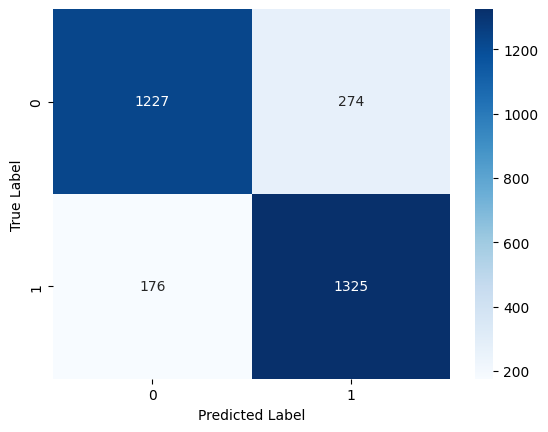

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
y_true = np.array([])
y_pred = np.array([])
for text, label in test_loader:
    y_true = np.append(y_true, label)
    y_pred = np.append(y_pred, rnn_cls(text.to(device)).cpu().detach().numpy())

In [ ]:
# y_pred에서 y_true를 기준으로 positive, negative로 분리
positive_idx = [idx for idx, label in enumerate(y_true) if label == 1]
negative_idx = [idx for idx, label in enumerate(y_true) if label == 0]
y_positive = [y_pred[idx] for idx in positive_idx]
y_negative = [y_pred[idx] for idx in negative_idx]

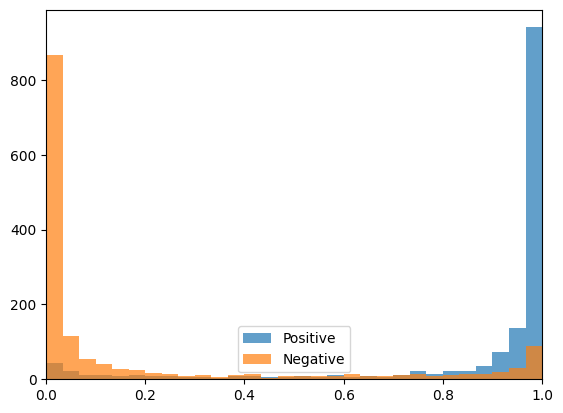

In [ ]:
plt.hist(y_positive, bins=30, label='Positive', color = 'C0', alpha=0.7)
plt.hist(y_negative, bins=30, label='Negative', color = 'C1', alpha=0.7)
plt.xlim([0, 1])
plt.legend()
plt.show()

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=ko

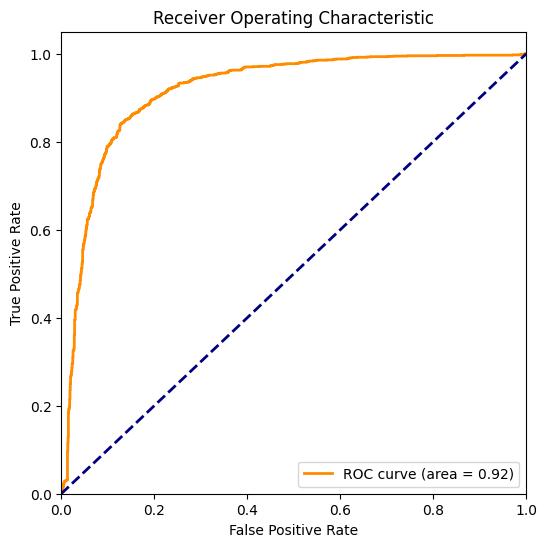

In [ ]:
# roc auc curve
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure( figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

다음으로 이미 구현된 RNN을 불러와서 다층으로 구현해보겠습니다.

다층 RNN(Recurrent Neural Network)을 정의하고, 텍스트 분류 작업을 수행하는 모델을 구현합니다.

In [1]:
emb_dim = 100
hidden_dim = 256
embed = nn.Embedding(vocab_size, emb_dim)
rnn = nn.RNN(emb_dim, hidden_dim, num_layers = 4, batch_first = True)
fc = nn.Linear(hidden_dim, 1)
sigmoid = nn.Sigmoid()

x = embed(samples.cpu())
print('emb', x.shape)
x, _ = rnn(x)
print('rnn', x.shape)
h_t = x[:, -1, :]
print('h_t', h_t.shape)
x = fc(h_t)
print('fc', x.shape)
x = sigmoid(x)

NameError: name 'nn' is not defined

In [ ]:
class MultiLayerRNN(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim):

        super(MultiLayerRNN, self).__init__()
        self.n_layers = n_layers
        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(embed_dim, hidden_dim, num_layers = n_layers, batch_first = True)
        self.fc1 = nn.Linear(hidden_dim, hidden_dim//2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim//2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embed(x)
        out, _ = self.rnn(x)
        h_t = out[:, -1, :]
        x = self.fc1(h_t)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [ ]:
samples.shape

torch.Size([512, 200])

In [ ]:
vocab_size = len(TEXT_vocab)

In [ ]:
vocab_size

8884

In [ ]:
sa_model = MultiLayerRNN(n_layers = 3, hidden_dim = 512, n_vocab = vocab_size, embed_dim = 256)
sa_model.to(device)

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(sa_model.parameters(), lr=0.001)

In [ ]:
sa_model

MultiLayerRNN(
  (embed): Embedding(8884, 256)
  (rnn): RNN(256, 512, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
def train(model, e, optimizer, train_iter):
    model.train()
    total_loss = 0  # 에포크 동안의 총 손실을 저장할 변수
    corrects, total = 0, 0  # 정확도 계산을 위한 변수

    for idx, batch in enumerate(train_iter):
        x, y = batch[0].to(device), batch[1].to(device).unsqueeze(1).float()
        optimizer.zero_grad()
        logit = model(x)
        loss = loss_fn(logit, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()  # 배치 손실을 총 손실에 더함

        # 정확도 계산
        pred = (logit > 0.5).float()
        corrects += (pred == y).sum().item()
        total += y.size(0)

    avg_loss = total_loss / len(train_iter)  # 에포크 동안의 평균 손실 계산
    accuracy = corrects / total  # 에포크 동안의 정확도 계산
    print("Train Epoch: {} \tAverage Loss: {:.6f} \tAccuracy: {:.4f}".format(e, avg_loss, accuracy))
    return avg_loss, accuracy


In [ ]:
def evaluate(model, val_iter):
    model.eval()
    corrects, total_loss, total = 0, 0, 0

    with torch.no_grad():
        for x, y in val_iter:
            x, y = x.to(device), y.to(device).unsqueeze(1).float()
            logit = model(x)
            loss = loss_fn(logit, y)
            total_loss += loss.item()
            total += y.size(0)
            pred = (logit > 0.5).float()
            corrects += (pred == y).sum().item()

    avg_loss = total_loss / len(val_iter)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [ ]:
EPOCHS = 25

train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for e in range(1, EPOCHS + 1):
    train_loss, train_accuracy =  train(sa_model, e, optimizer, train_loader)
    val_loss, val_accuracy = evaluate(sa_model, valid_loader)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_accuracy)
    valid_loss_list.append(val_loss)
    valid_acc_list.append(val_accuracy)
    print("[EPOCH: %d], Validation Loss: %5.2f | Validation Accuracy: %5.2f" % (e, val_loss, val_accuracy))

Train Epoch: 1 	Average Loss: 0.701453 	Accuracy: 0.4982
[EPOCH: 1], Validation Loss:  0.69 | Validation Accuracy:  0.50
Train Epoch: 2 	Average Loss: 0.694173 	Accuracy: 0.5050
[EPOCH: 2], Validation Loss:  0.69 | Validation Accuracy:  0.51
Train Epoch: 3 	Average Loss: 0.690245 	Accuracy: 0.5196
[EPOCH: 3], Validation Loss:  0.70 | Validation Accuracy:  0.50
Train Epoch: 4 	Average Loss: 0.689377 	Accuracy: 0.5176
[EPOCH: 4], Validation Loss:  0.71 | Validation Accuracy:  0.51
Train Epoch: 5 	Average Loss: 0.677119 	Accuracy: 0.5418
[EPOCH: 5], Validation Loss:  0.72 | Validation Accuracy:  0.51
Train Epoch: 6 	Average Loss: 0.663726 	Accuracy: 0.5420
[EPOCH: 6], Validation Loss:  0.72 | Validation Accuracy:  0.51
Train Epoch: 7 	Average Loss: 0.643791 	Accuracy: 0.5557
[EPOCH: 7], Validation Loss:  0.75 | Validation Accuracy:  0.51
Train Epoch: 8 	Average Loss: 0.630123 	Accuracy: 0.5625
[EPOCH: 8], Validation Loss:  0.80 | Validation Accuracy:  0.51
Train Epoch: 9 	Average Loss: 0.

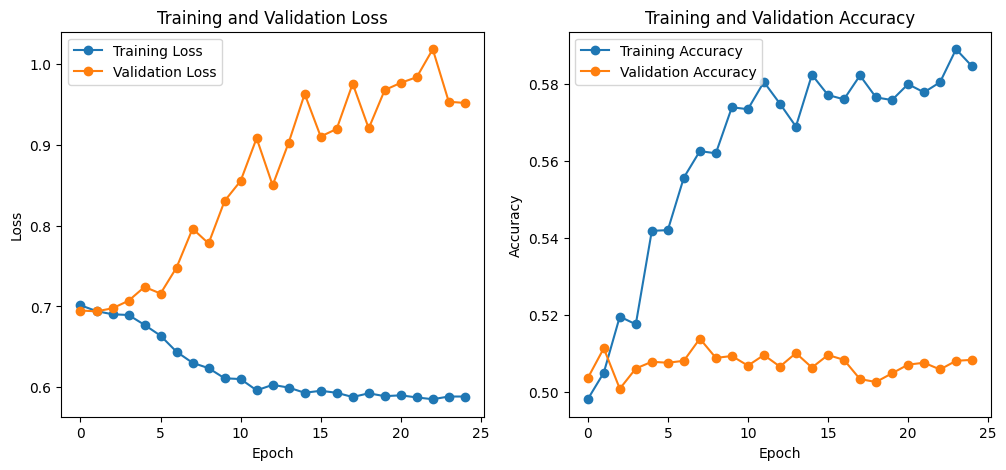

In [ ]:
import matplotlib.pyplot as plt

# 손실 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_list, 'o-', label='Training Loss')
plt.plot(valid_loss_list, 'o-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 정확도 시각화
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, 'o-', label='Training Accuracy')
plt.plot(valid_acc_list, 'o-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
# 1. 긍정적인 감성
test_text1 = "I absolutely loved the movie. The acting was superb and the storyline was captivating."
# 영화가 정말 마음에 들었어요. 연기가 훌륭했고 줄거리가 매력적이었어요.

# 2. 부정적인 감성
test_text2 = "The movie was a complete waste of time. The plot was predictable and the acting was terrible."
# 영화는 완전한 시간 낭비였어요. 줄거리가 뻔했고 연기가 형편없었어요.

# 3. 긍정적인 감성
test_text3 = "The book was a fantastic read. The characters were well-developed and the plot kept me hooked until the end."
# 책은 정말 훌륭한 읽을거리였어요. 캐릭터들이 잘 구성되었고 줄거리가 끝까지 저를 사로잡았어요.


# 4. 부정적인 감성
test_text4 = "The service at the restaurant was disappointing. The food was cold and the staff was rude."
# 레스토랑의 서비스는 실망스러웠어요. 음식은 차가웠고 직원들은 무례했어요.

In [ ]:
# 감성 예측
predicted_sentiment1 = predict_sentiment(sa_model, test_text1)
print(f"input text: {test_text1}")
print(f"Sentiment for the input text: {predicted_sentiment1}")
print()

predicted_sentiment2 = predict_sentiment(sa_model, test_text2)
print(f"input text: {test_text2}")
print(f"Sentiment for the input text: {predicted_sentiment2}")
print()

predicted_sentiment3 = predict_sentiment(sa_model, test_text3)
print(f"input text: {test_text3}")
print(f"Sentiment for the input text: {predicted_sentiment3}")
print()

predicted_sentiment4 = predict_sentiment(sa_model, test_text4)
print(f"input text: {test_text4}")
print(f"Sentiment for the input text: {predicted_sentiment4}")
print()

input text: I absolutely loved the movie. The acting was superb and the storyline was captivating.
Sentiment for the input text: Negative

input text: The movie was a complete waste of time. The plot was predictable and the acting was terrible.
Sentiment for the input text: Negative

input text: The book was a fantastic read. The characters were well-developed and the plot kept me hooked until the end.
Sentiment for the input text: Negative

input text: The service at the restaurant was disappointing. The food was cold and the staff was rude.
Sentiment for the input text: Negative



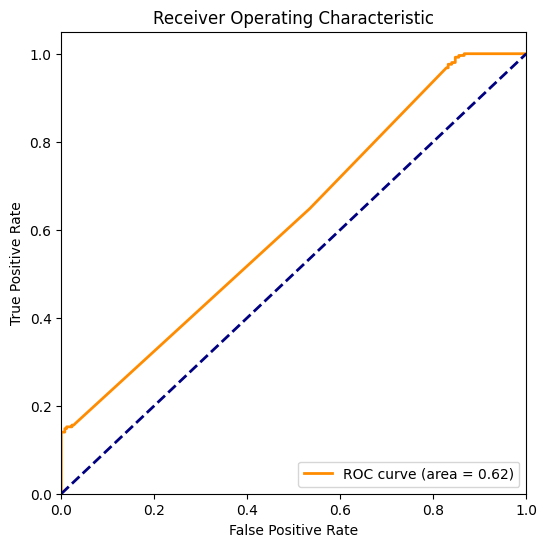

In [ ]:
# roc auc curve
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

for text, label in train_loader:
    y_true = label
    y_pred = rnn_cls(text.to(device)).cpu().detach().numpy()
    break

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure( figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


한글 데이터로 감성 분류!!!